# EDA and Data Processing
1. Display the data
2. Check for Datatype using info() and check for null values
3. Statistics about Data
4. Check for Outliers
5. Explore Categorical and Numerical Data
6. Feature Engineering
7. Check for Duplicates
8. Encoding
9. Normalization

In [2]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("insurance-data.csv")

# EDA & Pre-Processing

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Check for datatype**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Check for null values**

In [7]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio], index=['Null_sum','Null_ratio'])

,age,sex,bmi,children,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**check for unique**

In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=['num_unique','dtype'])

,age,sex,bmi,children,smoker,region,charges
num_unique,47,2,548,6,2,4,1337
dtype,int64,object,float64,int64,object,object,float64


**Reprsent some columns as categorical**

In [9]:
col="sex smoker region".split(" ")
df[col]=df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


**check for duplicted**

In [10]:
df.duplicated().sum()
print('duplication before processing',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('duplication after processing',df.duplicated().sum())

duplication before processing 1
duplication after processing 0


**Statistics about data**

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include="category")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


**check for outliers**

**visualization**

In [13]:
numeric_df=df.select_dtypes('number')
numeric_df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


<function matplotlib.pyplot.show(close=None, block=None)>

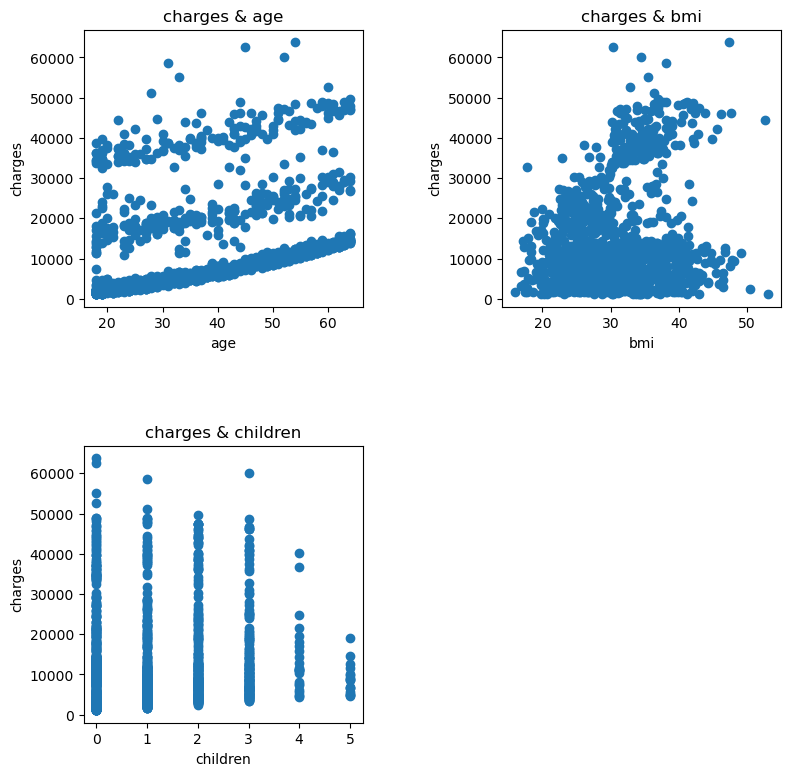

In [14]:
plt.figure(figsize=(9,9))
for i, col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.scatter (df[col],df["charges"])
    plt.ylabel("charges")
    plt.xlabel(col)
    plt.title(f"charges & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [15]:
corr=numeric_df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

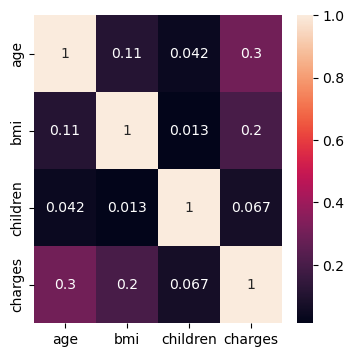

In [16]:
plt.figure(figsize=(4,4))
sns.heatmap(corr,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

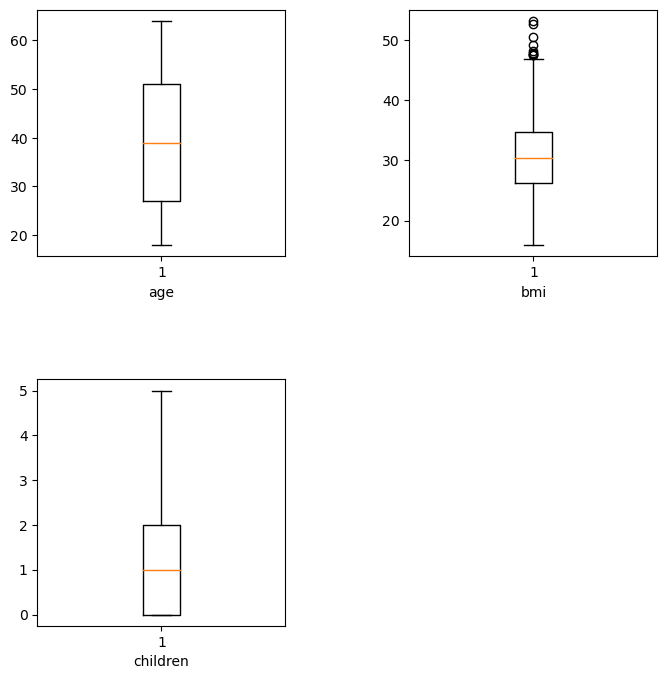

In [17]:
plt.figure(figsize=(8,8))
for i , col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

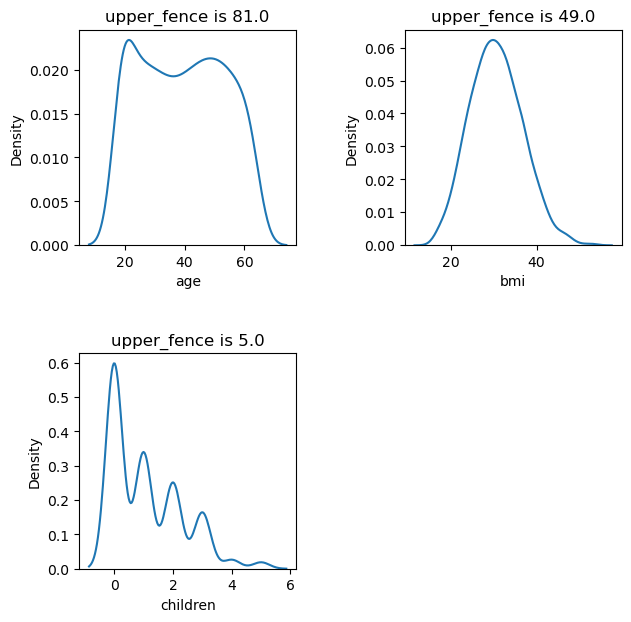

In [18]:
plt.figure(figsize=(7,7))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

**Check for outliers**

In [19]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*IQR
    ratio=1-(df[df[col]<=np.round(upper_fence)].shape[0]/df.shape[0])
    ind=df[df[col]>np.round(upper_fence)].index
    df.loc[ind,col:col]=np.round(upper_fence)
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {ratio}")
    print(df[col].max())
    print("------------")

Upper fence of age is: 87.0
Ration of Outliers 0.0
64
------------
Upper fence of bmi is: 47.31500000000001
Ration of Outliers 0.006731488406881092
47.0
------------
Upper fence of children is: 5.0
Ration of Outliers 0.0
5
------------


<function matplotlib.pyplot.show(close=None, block=None)>

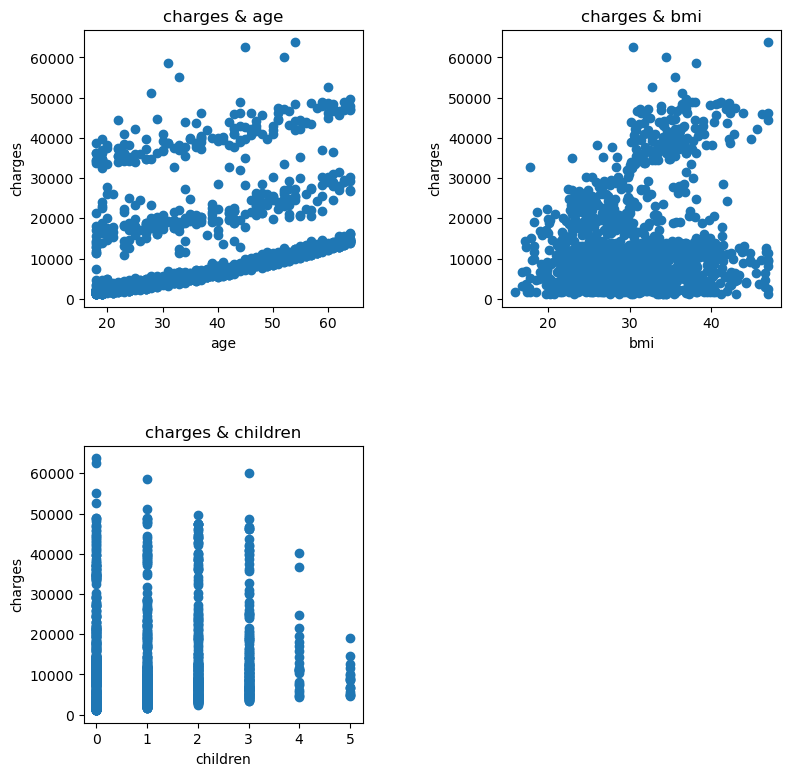

In [20]:
plt.figure(figsize=(9,9))
for i, col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.scatter (df[col],df["charges"])
    plt.ylabel("charges")
    plt.xlabel(col)
    plt.title(f"charges & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [21]:
categorical_df = df.select_dtypes("category")
categorical_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


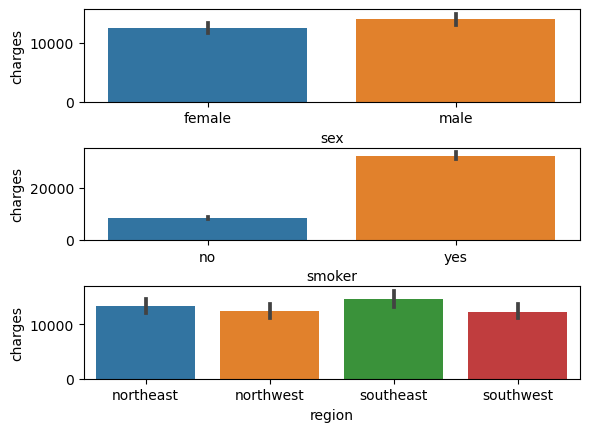

In [22]:
for i, col in enumerate(categorical_df.columns):
    plt.subplot(3, 1, i+1)
    sns.barplot(x = df[col], y = df["charges"])
    plt.xlabel = col
    
plt.subplots_adjust(hspace=.5)
plt.show()    


# Split data

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

# Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns

In [35]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_train[numeric_cols] = x_scaler.fit_transform(x_train[numeric_cols])
y_train[["charges"]] = y_scaler.fit_transform(y_train[["charges"]])

x_test[numeric_cols] = x_scaler.transform(x_test[numeric_cols])
y_test[["charges"]] = y_scaler.transform(y_test[["charges"]])

# Encoding

In [38]:
# one hot encoding
x_train =pd.get_dummies(x_train,columns=['sex','smoker','region'])
x_test =pd.get_dummies(x_test,columns=['sex','smoker','region'])

# ML

In [42]:
# Bulid the model and train model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**predict**

In [43]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

**Evaluation**

In [44]:
y_train=y_scaler.inverse_transform(y_train)
y_test=y_scaler.inverse_transform(y_test)

y_pred_train=y_scaler.inverse_transform(y_pred_train)
y_pred_test=y_scaler.inverse_transform(y_pred_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
training_err = np.round(mean_absolute_error(y_train, y_pred_train))
test_err = np.round(mean_absolute_error(y_test, y_pred_test))
print(test_err)
print(training_err)

783203.0
3963.0


In [53]:
train_acc = (abs(y_pred_train - y_train) < 100).sum() / y_train.shape[0] * 100 
test_acc = (abs(y_pred_test - y_test) < 100).sum() / y_test.shape[0] * 100 
print(train_acc)
print(test_acc)

2.569832402234637
0.0
